# CONTENTS

- IMPORTING DATA
- EXPLORING DATA
- SAMPLING DATA
- GENERATING VISUALIZATIONS

# IMPORTING DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# initialize path variable
path = r'/Users/smac_/Documents/Courses/CF Data Analytics Program/Data Immersion/Achievement 4/05-2023 Instacart Basket Analysis'

In [3]:
# import data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'f_orders_products_all.pkl'))

# EXPLORING DATA

In [4]:
# column names & data types
ords_prods_all.dtypes

order_id                   object
user_id                    object
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                 object
add_to_cart_order           int64
reordered                  object
product_name               object
aisle_id                   object
department_id              object
prices                    float64
price_range                object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
mean_spending             float64
spending_flag              object
median_frequency          float64
frequency_flag             object
gender                     object
state                      object
age                         int64
date_joined                object
dependants                  int64
marital_status             object
income        

In [5]:
# first 5 rows
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_frequency,frequency_flag,gender,state,age,date_joined,dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# last 5 rows
ords_prods_all.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_frequency,frequency_flag,gender,state,age,date_joined,dependants,marital_status,income
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404858,2922475,66343,4,1,12,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151


In [7]:
# dataframe size
ords_prods_all.shape

(32404859, 30)

# SAMPLING DATA

In [8]:
# set the seed & create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [9]:
# store 70% of the sample in the dataframe 'big'
big = ords_prods_all[dev]

In [10]:
# store 30% of the sample in the dataframe 'small'
small = ords_prods_all[~dev]

In [11]:
# total rows in original dataframe
len(ords_prods_all)

32404859

In [12]:
# samples rows added together
len(big) + len(small)

32404859

# GENERATING VISUALIZATIONS

## `'orders_day_of_week'` CATEGORICAL DISTRIBUTION

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_54927/1723352214.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bar_day_labels_x)


Text(0.5, 0, '# of Sales')

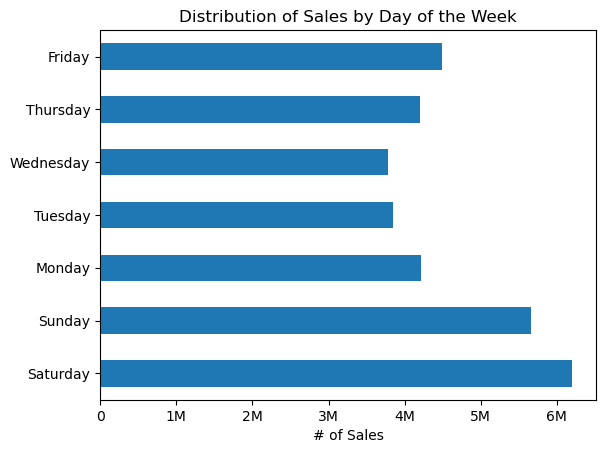

In [13]:
# generate a bar chart based on frequency counts in 'order_day_of_week' column
bar_day = ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.barh()
plt.title('Distribution of Sales by Day of the Week')
bar_day_labels_y = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.gca().set_yticklabels(bar_day_labels_y)
bar_day_labels_x = ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M']
plt.gca().set_xticklabels(bar_day_labels_x)
plt.xlabel('# of Sales')

In [14]:
# export chart
bar_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'), bbox_inches = 'tight')

## `'prices'` OUTLIER INSPECTION

Text(0.5, 1.0, 'Outlier Inspection in Prices')

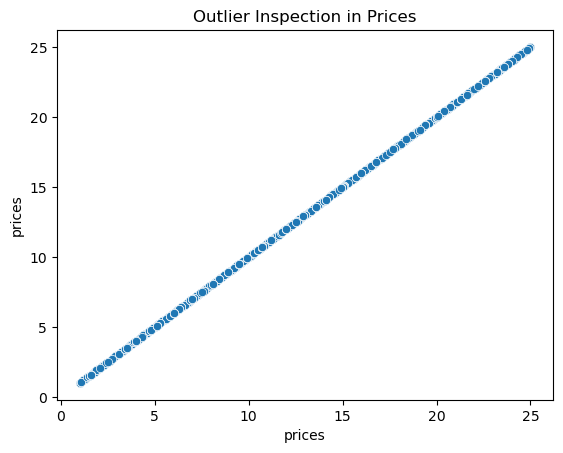

In [15]:
# generate scatterplot to inspect distribution of values in 'prices' column
scat_prices = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_all)
plt.title('Outlier Inspection in Prices')

## `'prices'` DISTRIBUTION

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_54927/4026313110.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(hist_prices_labels_y)


Text(0.5, 0, 'Prices')

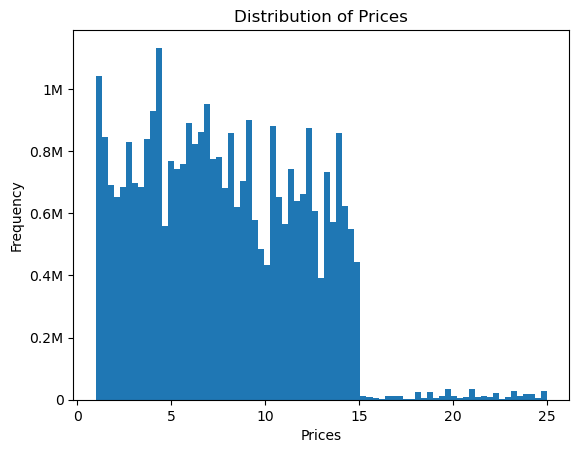

In [16]:
# generate a histogram based on frequency counts in 'prices' column
hist_prices = ords_prods_all['prices'].plot.hist(bins = 75)
plt.title('Distribution of Prices')
hist_prices_labels_y = ['0', '0.2M', '0.4M', '0.6M', '0.8M', '1M', '1.2M']
plt.gca().set_yticklabels(hist_prices_labels_y)
plt.xlabel('Prices')

In [17]:
# export chart
hist_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

## DEVELOPMENT IN PRICES ACROSS DAYS OF THE WEEK

In [18]:
# initialize dataframe containing only necessary columns
df_line_chart = small[['orders_day_of_week', 'prices']]

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_54927/2149351655.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(line_day_prices_labels_x, rotation = 'vertical')


Text(0.5, 0, 'Day of the Week')

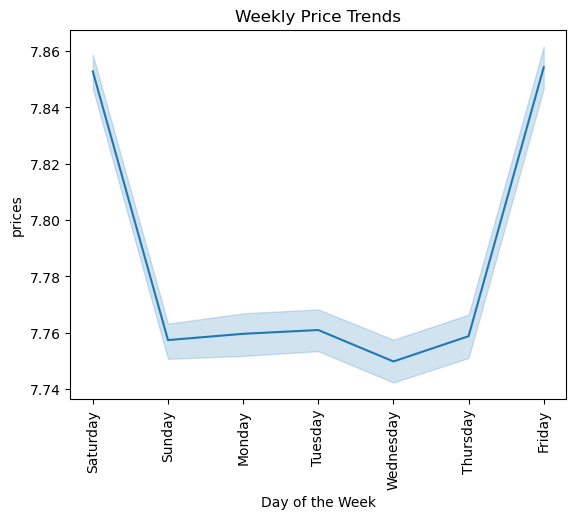

In [19]:
# generate a line chart based on the 'df_line_chart' sample dataframe
line_day_prices = sns.lineplot(data = df_line_chart, x = 'orders_day_of_week', y = 'prices')
plt.title('Weekly Price Trends')
line_day_prices_labels_x = ['Saturday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.gca().set_xticklabels(line_day_prices_labels_x, rotation = 'vertical')
plt.xlabel('Day of the Week')

In [20]:
# export chart
line_day_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_day_prices.png'), bbox_inches = 'tight')

## SALES BY HOUR DISTRIBUTION

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_54927/361429095.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(hist_sales_hr_labels_y)


[Text(0, 0.0, '0'),
 Text(0, 500000.0, '0.5M'),
 Text(0, 1000000.0, '1M'),
 Text(0, 1500000.0, '1.5M'),
 Text(0, 2000000.0, '2M'),
 Text(0, 2500000.0, '2.5M'),
 Text(0, 3000000.0, '3M')]

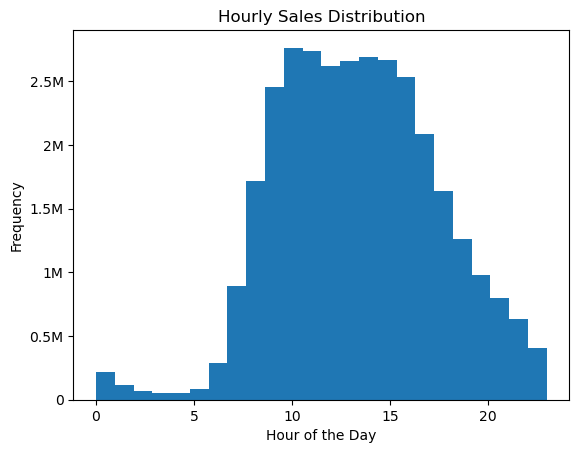

In [21]:
# generate a histogram based on frequency counts in 'order_hour_of_day' column
hist_sales_hr = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour of the Day')
hist_sales_hr_labels_y = ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M']
plt.gca().set_yticklabels(hist_sales_hr_labels_y)

The distribution of values in the `'order_hour_of_day'` column suggests that a majority of orders are placed between 10:00am and 3:00pm, whereas the fewest orders are recorded between midnight and 7:00am.

In [22]:
# export chart
hist_sales_hr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_sales_hr.png'))

## CUSTOMER LOYALTY DISTRIBUTION

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_54927/2217547550.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bar_loyalty_labels_x)


Text(0.5, 0, '# of Customers')

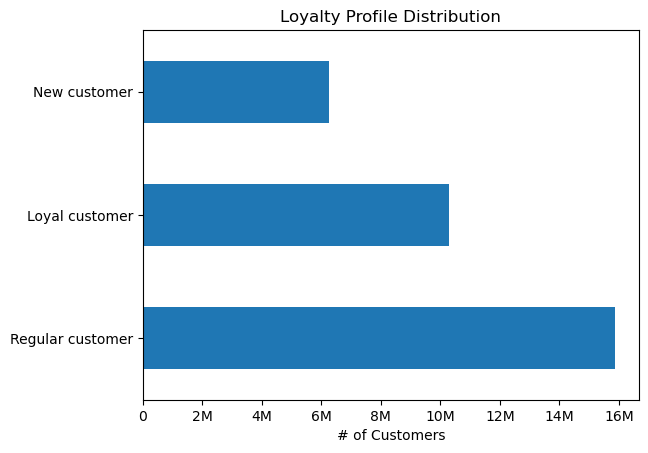

In [23]:
# generata a bar chart based on frequency counts in 'loyalty_flag' column
bar_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.barh()
plt.title('Loyalty Profile Distribution')
bar_loyalty_labels_x = ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M', '18M']
plt.gca().set_xticklabels(bar_loyalty_labels_x)
plt.xlabel('# of Customers')

The analysis of the `'loyalty_flag'` categories reveals that the most frequent occurrence in the data is the regular customer category, followed by the loyal customer category, and lastly the new customer category.

In [24]:
# export chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'), bbox_inches = 'tight')

## HOUR-BASED EXPENDITURE VARIATIONS

In [25]:
# initialize sample dataframe containing only necessary columns
df_prices_hr = small[['order_hour_of_day', 'prices']]

Text(0.5, 0, 'Hour of the Day')

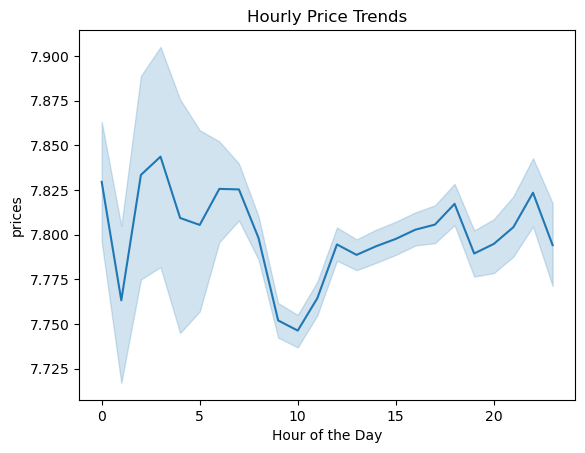

In [26]:
# generate a line chart based on 'df_prices_hr' sample dataframe
line_prices_hr = sns.lineplot(data = df_prices_hr, x = 'order_hour_of_day', y = 'prices')
plt.title('Hourly Price Trends')
plt.xlabel('Hour of the Day')

By examining the fluctuations in hourly expenditure, it has been discovered that orders made at approximately 11:00pm and 4:00am experience a surge in price. This indicates that buyers are inclined to spend significant sums of money prior to midnight and dawn.

In [27]:
# export chart
line_prices_hr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hr.png'))

## RELATIONSHIP BETWEEN AGE AND NUMBER OF DEPENDANTS

In [28]:
# initialize sample dataframe containing only necessary columns
df_age_dependants = small[['age', 'dependants']]

Text(0.5, 1.0, 'Age/# of Dependents Relationship')

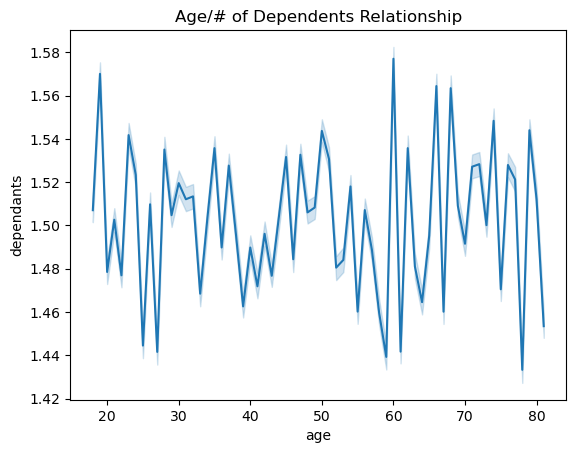

In [29]:
# generate a line chart based on 'df_line_age_dependants' sample dataframe
line_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age', y = 'dependants')
plt.title('Age/# of Dependents Relationship')

After examining the relationship between age and the number of dependents among customers, no significant correlation or discernible patterns were observed, suggesting the absence of any apparent trends between these two factors.

In [30]:
# export chart
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

## AGE & SPENDING POWER RELATIONSHIP

Text(0.5, 1.0, 'Age/Spending Power Relationship')

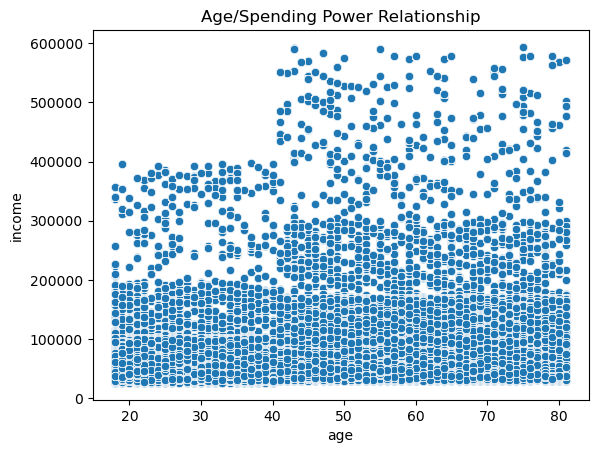

In [31]:
# generate scatterplot based on 'df_age_income' dataframe
scat_age_income = sns.scatterplot(data = ords_prods_all, x = 'age', y = 'income')
plt.title('Age/Spending Power Relationship')

There is a consistent neutral trend observed across all age groups within the income range of 0 to 200,000, suggesting that the majority of individuals have incomes within this range regardless of their age. However, as age increases, a noticeable shift towards higher income levels can be observed, indicating that older individuals are more likely to have higher incomes compared to younger individuals.

In [32]:
# export chart
scat_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_age_income.png'))